QUESTION 1 a)

In [58]:
# 20 newsgroups dataset - 20 topics, 18k newsgroups
# test, train or all

# 1. a) i. Fetching the dataset

from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('stopwords')

newsgpTrain = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))
newsgpTest = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'))

# print (len(newsgpTrain.data))  11314
# print (len(newsgpTest.data))   7532

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
print (newsgpTrain.target)


In [0]:
# 1. a) ii. Preprocessing the dataset

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

english_stopwords = set(stopwords.words('english'))

train = []
rem_punc = RegexpTokenizer(r'\w+')

for v in newsgpTrain.data:                           # one news article (v)
  temp = rem_punc.tokenize(v)                        # no punc, symbol, space
  temp = [words.lower() for words in temp]           # lower case
  temp = [w for w in temp if not w in english_stopwords]
  train.append(temp)                                 # train is a list of sentence (list of list of words)


In [0]:
## DON'T KNOW IF THIS IS USEFUL ##
'''
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(newsgpTrain.data)
print (type(vectors))
print (vectors.shape)
print ("0th ", vectors[0])
print ("0th ", vectors[0].shape)
print (vectors)
'''

In [0]:
# 1. a) iii. size=100 is the dimension of the vectors, min_count is minimum frequency
# alpha is learning rate
# min_alpha is the minimum learning rate [learning rate reduces linearly from alpha to min_alpha]

import gensim
from gensim import models

from gensim.models import Word2Vec

w2v_cbow = Word2Vec(size=100, window=5, min_count=10, alpha=0.01, min_alpha=0.001, workers=4)
w2v_sg = Word2Vec(size=100, window=5, min_count=10, alpha=0.01, min_alpha=0.001, workers=4, sg=1)

from gensim import corpora


In [61]:
# build vocabulary from list of sentences in train 

w2v_cbow.build_vocab(train, progress_per=1000)
w2v_sg.build_vocab(train, progress_per=1000)


INFO - 17:18:14: collecting all words and their counts
INFO - 17:18:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:18:14: PROGRESS: at sentence #1000, processed 126275 words, keeping 24323 word types
INFO - 17:18:14: PROGRESS: at sentence #2000, processed 268392 words, keeping 39565 word types
INFO - 17:18:14: PROGRESS: at sentence #3000, processed 371899 words, keeping 45857 word types
INFO - 17:18:14: PROGRESS: at sentence #4000, processed 511681 words, keeping 54707 word types
INFO - 17:18:14: PROGRESS: at sentence #5000, processed 686416 words, keeping 63209 word types
INFO - 17:18:14: PROGRESS: at sentence #6000, processed 805882 words, keeping 72295 word types
INFO - 17:18:14: PROGRESS: at sentence #7000, processed 928306 words, keeping 80004 word types
INFO - 17:18:14: PROGRESS: at sentence #8000, processed 1042785 words, keeping 84242 word types
INFO - 17:18:14: PROGRESS: at sentence #9000, processed 1156095 words, keeping 89038 word types
INFO 

In [0]:
# 1. a) iv. Size of vocabulary = 13905

print (len(w2v_cbow.wv.vocab))
print (len(w2v_sg.wv.vocab))

print (w2v_cbow)
print (w2v_sg)

13905
13905
Word2Vec(vocab=13905, size=100, alpha=0.01)
Word2Vec(vocab=13905, size=100, alpha=0.01)


In [62]:
# Train both models using the preprocessed training data

w2v_cbow.train(train, total_examples=w2v_cbow.corpus_count, epochs=30, report_delay=1)
w2v_sg.train(train, total_examples=w2v_sg.corpus_count, epochs=30, report_delay=1)

INFO - 17:18:23: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 17:18:24: EPOCH 1 - PROGRESS: at 37.18% examples, 441086 words/s, in_qsize 8, out_qsize 0
INFO - 17:18:25: EPOCH 1 - PROGRESS: at 75.54% examples, 446293 words/s, in_qsize 7, out_qsize 0
INFO - 17:18:25: worker thread finished; awaiting finish of 3 more threads
INFO - 17:18:25: worker thread finished; awaiting finish of 2 more threads
INFO - 17:18:25: worker thread finished; awaiting finish of 1 more threads
INFO - 17:18:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:18:25: EPOCH - 1 : training on 1438608 raw words (1179442 effective words) took 2.6s, 451893 effective words/s
INFO - 17:18:26: EPOCH 2 - PROGRESS: at 36.81% examples, 429816 words/s, in_qsize 7, out_qsize 1
INFO - 17:18:27: EPOCH 2 - PROGRESS: at 75.09% examples, 443576 words/s, in_qsize 7, out_qsize 1
INFO - 17:18:28: worker thread finished; awaiting finish 

(35382963, 43158240)

In [0]:
# 1. a) v. Words most similar to 'car' for CBOW model

most_sim = w2v_cbow.wv.most_similar(positive=['car']))
for pp in most_sim:
  print (pp)

similar_1 = w2v_cbow.wv.most_similar(positive=['girl', 'father'], negative=['boy'], topn=5)
similar_2 = w2v_cbow.wv.most_similar(positive=['sports', 'ball'], negative=['bat'], topn=5)

print (similar_1)
print (similar_2)

[(u'cars', 0.7870740294456482), (u'tires', 0.7568114995956421), (u'bike', 0.7288286685943604), (u'bikes', 0.7204039096832275), (u'dealership', 0.7089475989341736), (u'dealer', 0.7050365209579468), (u'replaced', 0.7034487128257751), (u'shop', 0.6988465189933777), (u'ford', 0.6952911615371704), (u'mercedes', 0.6929473876953125)]
[(u'son', 0.8112836480140686), (u'sons', 0.7489756345748901), (u'miracles', 0.7443153262138367), (u'daughters', 0.7382035255432129), (u'brothers', 0.7373194694519043)]
[(u'arena', 0.769304633140564), (u'veteran', 0.7136731147766113), (u'keenan', 0.7043173909187317), (u'watched', 0.702164888381958), (u'dallas', 0.7003322839736938)]


In [0]:
# 1. a) v. Words most similar to 'car' for SG model

print (w2v_sg.wv.most_similar(positive=['car']))

sim_1 = w2v_sg.wv.most_similar(positive=['girl', 'father'], negative=['boy'], topn=5)
sim_2 = w2v_sg.wv.most_similar(positive=['sports', 'ball'], negative=['bat'], topn=5)

print (sim_1)
print (sim_2)

[(u'cars', 0.7692788243293762), (u'volvo', 0.735893726348877), (u'camry', 0.6745791435241699), (u'nissan', 0.6687613129615784), (u'bikes', 0.6639589071273804), (u'trunk', 0.6573776602745056), (u'toyota', 0.6548501253128052), (u'luxury', 0.6533421277999878), (u'ford', 0.6524385213851929), (u'taurus', 0.6503356695175171)]
[(u'hanged', 0.6403051614761353), (u'son', 0.6392914056777954), (u'proceeds', 0.6392347812652588), (u'alessandro', 0.6147809624671936), (u'proceeding', 0.6138246059417725)]
[(u'nbc', 0.5486736297607422), (u'wrigley', 0.5358684659004211), (u'sunday', 0.5181744694709778), (u'announcer', 0.5146238803863525), (u'wip', 0.5119367241859436)]


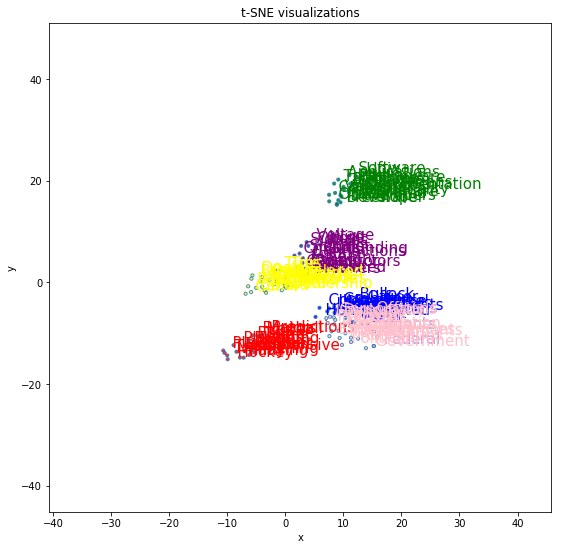

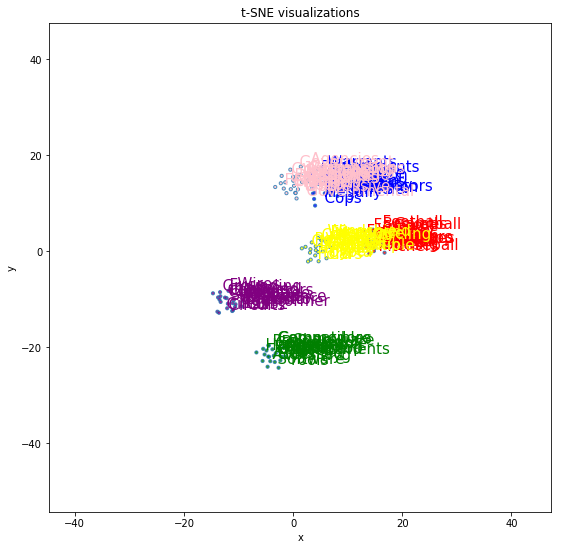

In [70]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# print (w2v_cbow.wv.__getitem__(['car']).shape)           # vector of word 'car'

def tsne_plot (model, list_of_words, top_num, colors):
  to_print = np.empty((0, 100), dtype='f')               # 100 dimensional vectors, rn 0 of them
  word_labels = []                                       # names of words to print on plot
  color_list = []
  
  # maintain the order in to_print and word_labels and color_list
  
  idx = 0
  
  for word in list_of_words:
    
    # add that word itself for printing
    to_print = np.append(to_print, model.wv.__getitem__([word]), axis=0)
    word_labels.append(word)
    color_list.append(colors[idx])
    
    # get 20 most similar words to 'word'
    top_words = model.wv.most_similar(positive=[word], topn=20)   # list of 20 (word, prob) tuples
    
    # add their vectors to to_print
    for close_wrds in top_words:
      vec_for_word = model.wv.__getitem__([close_wrds[0]])
      
      to_print = np.append(to_print, vec_for_word, axis=0)
      word_labels.append(close_wrds[0])
      color_list.append(colors[idx])
    
    idx = idx + 1
  
  red_dim = PCA(n_components=50).fit_transform(to_print)
  
  np.set_printoptions(suppress=True)
  
  Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(red_dim)                    # going ahead with defaults
  
  # Sets everything up to plot
  df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
  fig, _ = plt.subplots()
  fig.set_size_inches(9, 9)
    
  # Basic plot
  p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 10,
                                  'facecolors': df['color']
                                 }
                    )
    
  # Adds annotations one by one with a loop
  for line in range(0, df.shape[0]):
       p1.text(df["x"][line],
               df['y'][line],
               '  ' + df["words"][line].title(),
               horizontalalignment='left',
               verticalalignment='bottom', size='medium',
               color=df['color'][line],
               weight='normal'
              ).set_size(15)

    
  plt.xlim(Y[:, 0].min()-30, Y[:, 0].max()+30)
  plt.ylim(Y[:, 1].min()-30, Y[:, 1].max()+30)
          
  plt.title('t-SNE visualizations')

tsne_plot(w2v_cbow, ['baseball', 'software', 'police', 'government', 'circuit', 'car'], 20, ['red', 'green', 'blue', 'pink', 'purple', 'yellow'])
tsne_plot(w2v_sg, ['baseball', 'software', 'police', 'government', 'circuit', 'car'], 20, ['red', 'green', 'blue', 'pink', 'purple', 'yellow'])

QUESTION 1: Part ii)

In [0]:
# 1. a) viii.

# If we add another vector for paragraph ID (because a doc has paragraphs), we can use the 
# idea used in word2vec for generating vectors for documents.

# This is the basic idea of Doc2Vec.

# 1. b) iv.
# CBOW is performing better in this dataset


In [0]:
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

english_stopwords = set(stopwords.words('english'))

rem_punc = RegexpTokenizer(r'\w+')

def preprocess (list_of_sent):
  final = []
  for v in list_of_sent: 
    temp = rem_punc.tokenize(v)                        # no punc, symbol, space
    temp = [words.lower() for words in temp]           # lower case
    temp = [w for w in temp if not w in english_stopwords]
    final.append(temp)                                 # train is a list of sentence (list of list of words)
  return final

In [79]:
# 1. b) i.

# total = 18846
# 70% of 18846 ~ 13192      train
# 20% of 18846 = 3769       test
# 10% of 18846 ~ 1885       validation

# current train data size : 11314       # add 1878 to it
# current test  data size : 7532        # 1878 (more train) + 3769 (test) + 1885 (validate) = 7532

x_Train, x_Test, x_Validate = [], [], []
xx_Train, xx_Test, xx_Validate = [], [], []

y_Train, y_Test, y_Validate = [], [], []

Train_20 = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))
Test_20 = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'))

# add 1878 to train
for i in range(len(Train_20.data)):
  y_Train.append(Train_20.target[i])

for i in range(1878):
  Train_20.data.append(Test_20.data[i])
  y_Train.append(Test_20.target[i])
  Test_20.data.pop(i)

xx_Train = Train_20.data

# make 1885 for validation

for i in range(1885):
  xx_Validate.append(Test_20.data[i])
  y_Validate.append(Test_20.target[i])
  Test_20.data.pop(i)

xx_Test = Test_20.data

for i in range(len(Test_20.data)):
  y_Test.append(Test_20.target[i])

print (len(xx_Train))
print (len(xx_Test))
print (len(xx_Validate))

print (len(y_Train))
print (len(y_Test))
print (len(y_Validate))

xx_Train = preprocess(xx_Train)
xx_Test = preprocess(xx_Test)
xx_Validate = preprocess(xx_Validate)

  

13192
3769
1885
13192
3769
1885


In [0]:
from gensim.models import KeyedVectors
import numpy as np

def avr (model, sentence):
  sent_vec = np.zeros((1, 100))
  numw = numw + 1
  
  for w in sentence:
    sent_vec = np.add(sent_vec, model.wv.__getitem__([w]))
    numw = numw + 1

In [86]:
from gensim.models import KeyedVectors
import numpy as np

# averaging all words of a sentence
def avrg(model, sent):
    sent_vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model.wv.__getitem__([w])
            else:
                sent_vec = np.add(sent_vec, model.wv.__getitem__([w]))
            numw = numw + 1
        except:
            pass
    
    return np.asarray(sent_vec) / numw

''' 
def avrg (model, sentence):
  sent_vec = np.zeros(100)
  numw = 0
  for w in sentence:
    sent_vec = np.add(sent_vec, model.wv.__getitem__([w]))
    numw = numw + 1
  return np.asarray(sent_vec)/numw
'''

x_Train, x_Test, x_Validate = [], [], []

for sent in xx_Train:
  x_Train.append(avrg(w2v_cbow, sent))
  # print (len(x_Train))

for sent in xx_Test:
  x_Test.append(avrg(w2v_cbow, sent))

for sent in xx_Validate:
  x_Validate.append(avrg(w2v_cbow, sent))

print (len(x_Train))
print (len(x_Test))
print (len(x_Validate))


13192
3769
1885


In [89]:
from sklearn.neural_network import MLPClassifier
import pandas as pd

classifier = MLPClassifier(alpha = 0.7, max_iter=400, verbose=True) 
classifier.fit(x_Train, y_Train)
 
df_results = pd.DataFrame(data=np.zeros(shape=(1,3)), columns = ['classifier', 'train_score', 'test_score'] )
train_score = classifier.score(x_Train, y_Train)
test_score = classifier.score(x_Test, y_Test)
 
print  (classifier.predict_proba(x_Test))
print  (classifier.predict(x_Test))
 
df_results.loc[1,'classifier'] = "MLP"
df_results.loc[1,'train_score'] = train_score
df_results.loc[1,'test_score'] = test_score
 
print(df_results)
      
"""
Output
  classifier  train_score  test_score
         MLP          1.0         1.0
"""

AttributeError: ignored

In [0]:
import requests
file_url = 'https://github.com/nicholas-leonard/word2vec/blob/master/questions-words.txt'

r = requests.get(file_url, stream=True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# import logging
# del logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_list = []

for i in range(30):
  w2v_cbow.train(xx_Train, total_examples=w2v_cbow.corpus_count, epochs=1, report_delay=1, compute_loss=True)
  loss = w2v_cbow.get_latest_training_loss()
  loss_list.append(loss)
  print ("loss at iteration ", i, " ", loss)


WARNING - 18:07:28: Effective 'alpha' higher than previous training cycles
INFO - 18:07:28: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 18:07:29: EPOCH 1 - PROGRESS: at 39.92% examples, 486504 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:30: EPOCH 1 - PROGRESS: at 84.92% examples, 499684 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:31: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:31: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:31: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:31: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:31: EPOCH - 1 : training on 1635577 raw words (1345422 effective words) took 2.7s, 502103 effective words/s
WARNING - 18:07:31: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:31: training on a 1635577 raw words (1345422 effective words) t

('loss at iteration ', 0, ' ', 592882.0)


INFO - 18:07:32: EPOCH 1 - PROGRESS: at 40.18% examples, 494466 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:33: EPOCH 1 - PROGRESS: at 83.98% examples, 498179 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:33: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:33: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:33: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:33: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:33: EPOCH - 1 : training on 1635577 raw words (1345260 effective words) took 2.7s, 503770 effective words/s
WARNING - 18:07:33: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:33: training on a 1635577 raw words (1345260 effective words) took 2.7s, 500076 effective words/s
WARNING - 18:07:33: Effective 'alpha' higher than previous training cycles
INFO - 18:07:33: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 1, ' ', 579491.4375)


INFO - 18:07:35: EPOCH 1 - PROGRESS: at 39.92% examples, 489222 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:36: EPOCH 1 - PROGRESS: at 83.98% examples, 500942 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:36: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:36: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:36: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:36: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:36: EPOCH - 1 : training on 1635577 raw words (1345656 effective words) took 2.7s, 506019 effective words/s
WARNING - 18:07:36: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:36: training on a 1635577 raw words (1345656 effective words) took 2.7s, 505250 effective words/s
WARNING - 18:07:36: Effective 'alpha' higher than previous training cycles
INFO - 18:07:36: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 2, ' ', 575869.5625)


INFO - 18:07:37: EPOCH 1 - PROGRESS: at 39.92% examples, 494516 words/s, in_qsize 7, out_qsize 1
INFO - 18:07:38: EPOCH 1 - PROGRESS: at 85.16% examples, 507132 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:39: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:39: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:39: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:39: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:39: EPOCH - 1 : training on 1635577 raw words (1345337 effective words) took 2.6s, 510344 effective words/s
WARNING - 18:07:39: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:39: training on a 1635577 raw words (1345337 effective words) took 2.6s, 509533 effective words/s
WARNING - 18:07:39: Effective 'alpha' higher than previous training cycles
INFO - 18:07:39: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 3, ' ', 561670.8125)


INFO - 18:07:40: EPOCH 1 - PROGRESS: at 39.92% examples, 486639 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:41: EPOCH 1 - PROGRESS: at 83.05% examples, 490673 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:41: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:41: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:41: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:41: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:41: EPOCH - 1 : training on 1635577 raw words (1345350 effective words) took 2.7s, 499307 effective words/s
WARNING - 18:07:41: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:41: training on a 1635577 raw words (1345350 effective words) took 2.7s, 498669 effective words/s
WARNING - 18:07:41: Effective 'alpha' higher than previous training cycles
INFO - 18:07:41: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 4, ' ', 565311.8125)


INFO - 18:07:43: EPOCH 1 - PROGRESS: at 41.50% examples, 516608 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:44: EPOCH 1 - PROGRESS: at 86.04% examples, 517704 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:44: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:44: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:44: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:44: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:44: EPOCH - 1 : training on 1635577 raw words (1345497 effective words) took 2.6s, 519820 effective words/s
WARNING - 18:07:44: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:44: training on a 1635577 raw words (1345497 effective words) took 2.6s, 516198 effective words/s
WARNING - 18:07:44: Effective 'alpha' higher than previous training cycles
INFO - 18:07:44: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 5, ' ', 584280.625)


INFO - 18:07:45: EPOCH 1 - PROGRESS: at 40.73% examples, 491043 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:46: EPOCH 1 - PROGRESS: at 84.18% examples, 502397 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:47: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:47: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:47: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:47: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:47: EPOCH - 1 : training on 1635577 raw words (1345695 effective words) took 2.6s, 509260 effective words/s
WARNING - 18:07:47: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:47: training on a 1635577 raw words (1345695 effective words) took 2.7s, 505941 effective words/s
WARNING - 18:07:47: Effective 'alpha' higher than previous training cycles
INFO - 18:07:47: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 6, ' ', 563570.3125)


INFO - 18:07:48: EPOCH 1 - PROGRESS: at 40.30% examples, 499438 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:49: EPOCH 1 - PROGRESS: at 85.16% examples, 505350 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:49: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:49: EPOCH - 1 : training on 1635577 raw words (1345571 effective words) took 2.6s, 513008 effective words/s
WARNING - 18:07:49: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:49: training on a 1635577 raw words (1345571 effective words) took 2.6s, 511608 effective words/s
WARNING - 18:07:49: Effective 'alpha' higher than previous training cycles
INFO - 18:07:49: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 7, ' ', 548322.8125)


INFO - 18:07:50: EPOCH 1 - PROGRESS: at 39.92% examples, 492716 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:51: EPOCH 1 - PROGRESS: at 82.19% examples, 492680 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:52: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:52: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:52: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:52: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:52: EPOCH - 1 : training on 1635577 raw words (1345052 effective words) took 2.7s, 498659 effective words/s
WARNING - 18:07:52: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:52: training on a 1635577 raw words (1345052 effective words) took 2.7s, 497634 effective words/s
WARNING - 18:07:52: Effective 'alpha' higher than previous training cycles
INFO - 18:07:52: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 8, ' ', 555777.6875)


INFO - 18:07:53: EPOCH 1 - PROGRESS: at 40.74% examples, 493258 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:54: EPOCH 1 - PROGRESS: at 85.36% examples, 506986 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:55: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:55: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:55: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:55: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:55: EPOCH - 1 : training on 1635577 raw words (1345698 effective words) took 2.7s, 507715 effective words/s
WARNING - 18:07:55: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:55: training on a 1635577 raw words (1345698 effective words) took 2.7s, 505910 effective words/s
WARNING - 18:07:55: Effective 'alpha' higher than previous training cycles
INFO - 18:07:55: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 9, ' ', 528709.75)


INFO - 18:07:56: EPOCH 1 - PROGRESS: at 39.92% examples, 489560 words/s, in_qsize 7, out_qsize 0
INFO - 18:07:57: EPOCH 1 - PROGRESS: at 83.94% examples, 501493 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:57: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:57: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:57: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:57: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:57: EPOCH - 1 : training on 1635577 raw words (1345299 effective words) took 2.6s, 507878 effective words/s
WARNING - 18:07:57: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:07:57: training on a 1635577 raw words (1345299 effective words) took 2.7s, 502432 effective words/s
WARNING - 18:07:57: Effective 'alpha' higher than previous training cycles
INFO - 18:07:57: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 10, ' ', 554961.6875)


INFO - 18:07:58: EPOCH 1 - PROGRESS: at 39.92% examples, 493922 words/s, in_qsize 8, out_qsize 0
INFO - 18:07:59: EPOCH 1 - PROGRESS: at 83.98% examples, 502873 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:00: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:00: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:00: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:00: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:00: EPOCH - 1 : training on 1635577 raw words (1345455 effective words) took 2.7s, 504683 effective words/s
WARNING - 18:08:00: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:00: training on a 1635577 raw words (1345455 effective words) took 2.7s, 502914 effective words/s
WARNING - 18:08:00: Effective 'alpha' higher than previous training cycles
INFO - 18:08:00: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 11, ' ', 556944.75)


INFO - 18:08:01: EPOCH 1 - PROGRESS: at 40.30% examples, 491961 words/s, in_qsize 8, out_qsize 1
INFO - 18:08:02: EPOCH 1 - PROGRESS: at 85.36% examples, 505655 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:03: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:03: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:03: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:03: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:03: EPOCH - 1 : training on 1635577 raw words (1345600 effective words) took 2.6s, 508882 effective words/s
WARNING - 18:08:03: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:03: training on a 1635577 raw words (1345600 effective words) took 2.7s, 506376 effective words/s
WARNING - 18:08:03: Effective 'alpha' higher than previous training cycles
INFO - 18:08:03: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 12, ' ', 537067.0)


INFO - 18:08:04: EPOCH 1 - PROGRESS: at 39.92% examples, 482184 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:05: EPOCH 1 - PROGRESS: at 83.29% examples, 488823 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:06: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:06: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:06: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:06: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:06: EPOCH - 1 : training on 1635577 raw words (1345364 effective words) took 2.7s, 497781 effective words/s
WARNING - 18:08:06: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:06: training on a 1635577 raw words (1345364 effective words) took 2.7s, 496559 effective words/s
WARNING - 18:08:06: Effective 'alpha' higher than previous training cycles
INFO - 18:08:06: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 13, ' ', 569654.75)


INFO - 18:08:07: EPOCH 1 - PROGRESS: at 40.73% examples, 493127 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:08: EPOCH 1 - PROGRESS: at 85.16% examples, 507401 words/s, in_qsize 6, out_qsize 0
INFO - 18:08:08: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:08: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:08: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:08: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:08: EPOCH - 1 : training on 1635577 raw words (1345651 effective words) took 2.7s, 507726 effective words/s
WARNING - 18:08:08: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:08: training on a 1635577 raw words (1345651 effective words) took 2.7s, 506313 effective words/s
WARNING - 18:08:08: Effective 'alpha' higher than previous training cycles
INFO - 18:08:08: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 14, ' ', 523814.03125)


INFO - 18:08:09: EPOCH 1 - PROGRESS: at 40.74% examples, 502089 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:10: EPOCH 1 - PROGRESS: at 83.98% examples, 501116 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:11: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:11: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:11: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:11: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:11: EPOCH - 1 : training on 1635577 raw words (1345723 effective words) took 2.6s, 508967 effective words/s
WARNING - 18:08:11: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:11: training on a 1635577 raw words (1345723 effective words) took 2.6s, 508304 effective words/s
WARNING - 18:08:11: Effective 'alpha' higher than previous training cycles
INFO - 18:08:11: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 15, ' ', 513409.21875)


INFO - 18:08:12: EPOCH 1 - PROGRESS: at 40.85% examples, 499901 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:13: EPOCH 1 - PROGRESS: at 85.83% examples, 509824 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:13: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:13: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:13: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:13: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:13: EPOCH - 1 : training on 1635577 raw words (1345410 effective words) took 2.6s, 516652 effective words/s
WARNING - 18:08:13: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:13: training on a 1635577 raw words (1345410 effective words) took 2.6s, 514694 effective words/s
WARNING - 18:08:13: Effective 'alpha' higher than previous training cycles
INFO - 18:08:13: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 16, ' ', 533392.9375)


INFO - 18:08:14: EPOCH 1 - PROGRESS: at 40.85% examples, 496324 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:16: EPOCH 1 - PROGRESS: at 85.36% examples, 498490 words/s, in_qsize 7, out_qsize 1
INFO - 18:08:16: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:16: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:16: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:16: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:16: EPOCH - 1 : training on 1635577 raw words (1345261 effective words) took 2.7s, 499717 effective words/s
WARNING - 18:08:16: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:16: training on a 1635577 raw words (1345261 effective words) took 2.7s, 497377 effective words/s
WARNING - 18:08:16: Effective 'alpha' higher than previous training cycles
INFO - 18:08:16: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 17, ' ', 528337.25)


INFO - 18:08:17: EPOCH 1 - PROGRESS: at 40.18% examples, 491188 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:18: EPOCH 1 - PROGRESS: at 85.16% examples, 502465 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:19: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:19: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:19: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:19: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:19: EPOCH - 1 : training on 1635577 raw words (1345367 effective words) took 2.7s, 504337 effective words/s
WARNING - 18:08:19: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:19: training on a 1635577 raw words (1345367 effective words) took 2.7s, 500771 effective words/s
WARNING - 18:08:19: Effective 'alpha' higher than previous training cycles
INFO - 18:08:19: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 18, ' ', 510273.0)


INFO - 18:08:20: EPOCH 1 - PROGRESS: at 40.18% examples, 491020 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:21: EPOCH 1 - PROGRESS: at 85.36% examples, 506780 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:21: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:21: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:22: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:22: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:22: EPOCH - 1 : training on 1635577 raw words (1345706 effective words) took 2.6s, 508715 effective words/s
WARNING - 18:08:22: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:22: training on a 1635577 raw words (1345706 effective words) took 2.7s, 506115 effective words/s
WARNING - 18:08:22: Effective 'alpha' higher than previous training cycles
INFO - 18:08:22: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 19, ' ', 550901.4375)


INFO - 18:08:23: EPOCH 1 - PROGRESS: at 39.92% examples, 483891 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:24: EPOCH 1 - PROGRESS: at 83.98% examples, 498813 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:24: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:24: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:24: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:24: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:24: EPOCH - 1 : training on 1635577 raw words (1345520 effective words) took 2.7s, 503509 effective words/s
WARNING - 18:08:24: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:24: training on a 1635577 raw words (1345520 effective words) took 2.7s, 502483 effective words/s
WARNING - 18:08:24: Effective 'alpha' higher than previous training cycles
INFO - 18:08:24: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 20, ' ', 565170.125)


INFO - 18:08:25: EPOCH 1 - PROGRESS: at 39.92% examples, 489409 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:26: EPOCH 1 - PROGRESS: at 82.64% examples, 489102 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:27: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:27: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:27: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:27: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:27: EPOCH - 1 : training on 1635577 raw words (1345588 effective words) took 2.7s, 492831 effective words/s
WARNING - 18:08:27: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:27: training on a 1635577 raw words (1345588 effective words) took 2.7s, 492132 effective words/s
WARNING - 18:08:27: Effective 'alpha' higher than previous training cycles
INFO - 18:08:27: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 21, ' ', 532183.5)


INFO - 18:08:28: EPOCH 1 - PROGRESS: at 40.73% examples, 492569 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:29: EPOCH 1 - PROGRESS: at 85.36% examples, 498037 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:30: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:30: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:30: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:30: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:30: EPOCH - 1 : training on 1635577 raw words (1345581 effective words) took 2.7s, 506769 effective words/s
WARNING - 18:08:30: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:30: training on a 1635577 raw words (1345581 effective words) took 2.7s, 505167 effective words/s
WARNING - 18:08:30: Effective 'alpha' higher than previous training cycles
INFO - 18:08:30: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 22, ' ', 502978.03125)


INFO - 18:08:31: EPOCH 1 - PROGRESS: at 39.92% examples, 492892 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:32: EPOCH 1 - PROGRESS: at 83.98% examples, 501874 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:32: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:32: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:32: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:32: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:32: EPOCH - 1 : training on 1635577 raw words (1345839 effective words) took 2.7s, 505789 effective words/s
WARNING - 18:08:32: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:32: training on a 1635577 raw words (1345839 effective words) took 2.7s, 504725 effective words/s
WARNING - 18:08:32: Effective 'alpha' higher than previous training cycles
INFO - 18:08:32: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 23, ' ', 488003.4375)


INFO - 18:08:33: EPOCH 1 - PROGRESS: at 40.18% examples, 496137 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:34: EPOCH 1 - PROGRESS: at 85.36% examples, 510872 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:35: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:35: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:35: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:35: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:35: EPOCH - 1 : training on 1635577 raw words (1345539 effective words) took 2.6s, 508864 effective words/s
WARNING - 18:08:35: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:35: training on a 1635577 raw words (1345539 effective words) took 2.7s, 506058 effective words/s
WARNING - 18:08:35: Effective 'alpha' higher than previous training cycles
INFO - 18:08:35: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 24, ' ', 493334.5625)


INFO - 18:08:36: EPOCH 1 - PROGRESS: at 40.74% examples, 501018 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:37: EPOCH 1 - PROGRESS: at 83.05% examples, 497202 words/s, in_qsize 7, out_qsize 0
INFO - 18:08:38: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:38: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:38: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:38: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:38: EPOCH - 1 : training on 1635577 raw words (1345253 effective words) took 2.7s, 500752 effective words/s
WARNING - 18:08:38: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:38: training on a 1635577 raw words (1345253 effective words) took 2.7s, 498479 effective words/s
WARNING - 18:08:38: Effective 'alpha' higher than previous training cycles
INFO - 18:08:38: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 25, ' ', 524452.875)


INFO - 18:08:39: EPOCH 1 - PROGRESS: at 39.91% examples, 482261 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:40: EPOCH 1 - PROGRESS: at 81.70% examples, 486413 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:40: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:40: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:40: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:40: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:40: EPOCH - 1 : training on 1635577 raw words (1345245 effective words) took 2.7s, 494100 effective words/s
WARNING - 18:08:40: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:40: training on a 1635577 raw words (1345245 effective words) took 2.7s, 491609 effective words/s
WARNING - 18:08:40: Effective 'alpha' higher than previous training cycles
INFO - 18:08:40: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 26, ' ', 523965.375)


INFO - 18:08:41: EPOCH 1 - PROGRESS: at 40.74% examples, 502742 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:42: EPOCH 1 - PROGRESS: at 85.16% examples, 508157 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:43: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:43: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:43: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:43: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:43: EPOCH - 1 : training on 1635577 raw words (1345379 effective words) took 2.7s, 504674 effective words/s
WARNING - 18:08:43: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:43: training on a 1635577 raw words (1345379 effective words) took 2.7s, 503900 effective words/s
WARNING - 18:08:43: Effective 'alpha' higher than previous training cycles
INFO - 18:08:43: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 27, ' ', 512441.5625)


INFO - 18:08:44: EPOCH 1 - PROGRESS: at 40.74% examples, 493911 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:45: EPOCH 1 - PROGRESS: at 83.74% examples, 496672 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:46: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:46: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:46: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:46: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:46: EPOCH - 1 : training on 1635577 raw words (1345630 effective words) took 2.7s, 499207 effective words/s
WARNING - 18:08:46: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:46: training on a 1635577 raw words (1345630 effective words) took 2.7s, 497786 effective words/s
WARNING - 18:08:46: Effective 'alpha' higher than previous training cycles
INFO - 18:08:46: training model with 4 workers on 13905 vocabulary and 100 features, using sg=0 hs=

('loss at iteration ', 28, ' ', 506100.25)


INFO - 18:08:47: EPOCH 1 - PROGRESS: at 39.91% examples, 484694 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:48: EPOCH 1 - PROGRESS: at 81.95% examples, 487413 words/s, in_qsize 8, out_qsize 0
INFO - 18:08:48: worker thread finished; awaiting finish of 3 more threads
INFO - 18:08:48: worker thread finished; awaiting finish of 2 more threads
INFO - 18:08:48: worker thread finished; awaiting finish of 1 more threads
INFO - 18:08:48: worker thread finished; awaiting finish of 0 more threads
INFO - 18:08:48: EPOCH - 1 : training on 1635577 raw words (1345362 effective words) took 2.7s, 497165 effective words/s
WARNING - 18:08:48: EPOCH - 1 : supplied example count (13192) did not equal expected count (11314)
INFO - 18:08:48: training on a 1635577 raw words (1345362 effective words) took 2.7s, 495115 effective words/s


('loss at iteration ', 29, ' ', 577262.0)


In [0]:
import numpy as np

plt.plot(np.arange(1, 31, 1), loss_list)
plt.show()

In [0]:
loss = w2v_cbow.get_latest_training_loss()
train_accuracy = 1 - (loss / 474631260)

print (train_accuracy)

0.908577433353


In [0]:
w2v_sg.train(xx_Train, total_examples=sg.corpus_count, epochs=1, report_delay=1, compute_loss=True)

WARNING - 18:08:48: Effective 'alpha' higher than previous training cycles
INFO - 18:08:49: training model with 4 workers on 13905 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
Exception in thread Thread-609:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/usr/local/lib/python2.7/dist-packages/gensim/models/base_any2vec.py", line 270, in _job_producer
    epoch_progress = 1.0 * pushed_words / total_words
TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

